In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# CONTENT_FOLDER_PATH = '/content/drive/MyDrive/FourthBrain/Capstone/GradCAM/Test'
# import os
# os.chdir(CONTENT_FOLDER_PATH)

Mounted at /content/drive


In [4]:
# !pip install tensorflow_addons
# !pip install tf_explain

     |████████████████████████████████| 1.1 MB 3.1 MB/s 


In [5]:
# from keras.models import load_model
# import tensorflow_addons as tfa
# fncF1score = tfa.metrics.F1Score(4,"micro")
# model = load_model('oct_xception10per16Layers.h5', custom_objects={"custom_metric": fncF1score})

In [35]:
from tf_explain.core.grad_cam import GradCAM
import tf_explain
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import cv2

last_conv_layer = "block14_sepconv2_act"
img_size=(224,224)

preprocess_input = keras.applications.xception.preprocess_input
# decode_predictions = keras.applications.xception.decode_predictions

def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array, img

def get_predicted_class(img_array, model):
    y_pred = model.predict(img_array)
    return np.argmax(y_pred)

def get_sample_heatmapx(img, model):
  # col_data = y_val[:,class_num]
  # sample_id = np.argmax(col_data)
  # image = X_val[sample_id]
    img_array = preprocess_input(img)
    img_array1 = img_array.reshape(224,224,3)
    class_index = get_predicted_class(img, model)
    # print(class_index)
    explainer = GradCAM()
    heat_map = explainer.explain(([img_array1], None), model.layers[1],
                                  layer_name=last_conv_layer, 
                                class_index=class_index, image_weight=0.9 )

    plt.imshow(heat_map)
    plt.show()


def print_activation_map(img_path, model):
    img_array1, img = get_img_array(img_path, size=img_size)
    # y_pred = model.predict(img_array1)
    # print(y_pred)
    # display(img)
    get_sample_heatmapx(img_array1, model)


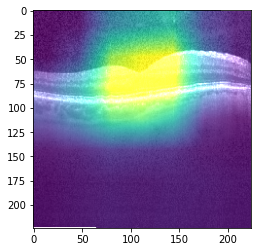

In [37]:
img_path = r'./train/DRUSEN/DRUSEN-142234-4.jpeg'
print_activation_map(img_path, model)